 # <font color='green'>whether data forecasting 8 cities in India (1990 - 2022)</font>
 <font color = 'yellow'>==========================================================================================</font>

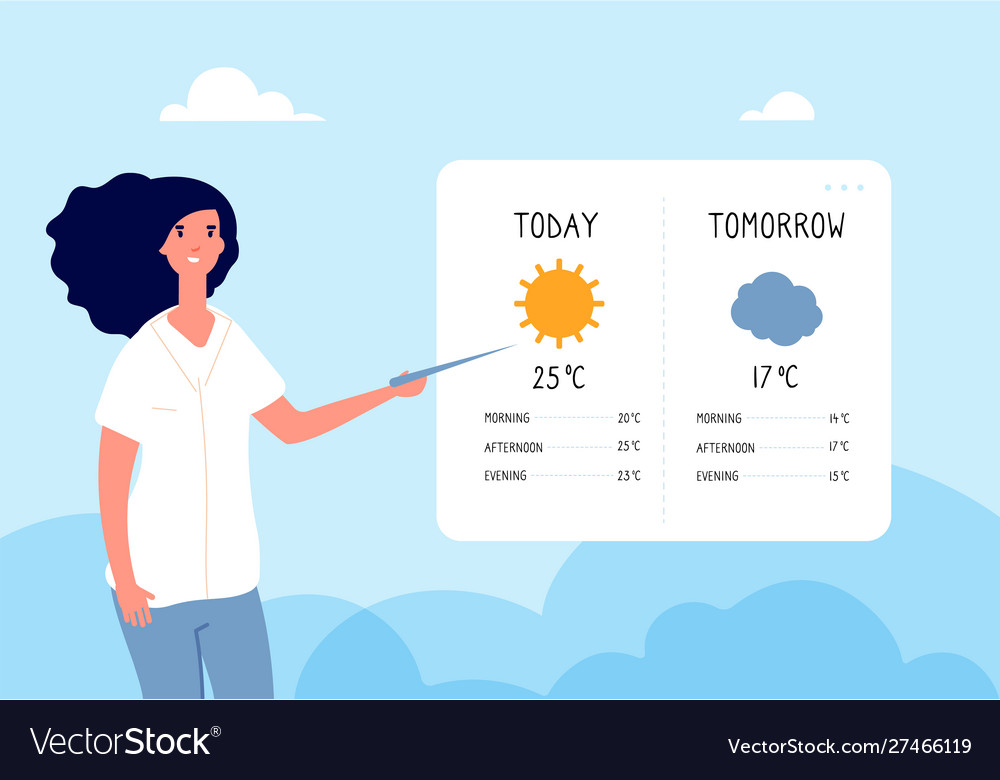


 # <font color='red'> Data Description</font>

<font color='blue'>About Dataset </font>

Any Data is as good as its Description, so here's a brief explanation:

The following data set contains Temperature data (Minimum, Average, Maximum) in degrees Centigrade and Precipitation data in mm.

This data set contains daily Temperature and Precipitation data from 01/01/1990 to 20/07/2022.
Data for the following cities is present :

<font color='green'>*Delhi</font><br> 
<font color='green'>*Bangalore</font><br>
<font color='green '>*Chennai</font><br> 
<font color='green'>*Lucknow</font><br>
<font color='green'>*Rajasthan</font><br>
<font color='green'>*Mumbai</font><br>
<font color='green'>*Bhubaneswar</font><br>
<font color='green'>*Rourkela</font> 

The station Geolocation file will give you the approximate location from where these measurements are taken.

What Can you do with this Data Set ?

* Can you Find the hottest/coldest years for each city?
* Can you Find precipitation averages and tell when rainfall was abnormally less or abnormally more?
* Can you Prove that temperature is increasing and if so at what rate (degree increase/ year)?
* Can you create Effective Visualization to convey the same?

Note: This Data set is ideal for Beginners and college students to hone their data science and Visualization skills

# <font color = green> some wheather key points </font>

- <font color = red>precipitaion</font> is  process of water form in the sky which form as the clouds,
    the rapid temperature increases water evoparates from the  water bodies and  vapour froms in sky.
    the air hits with certain speed at the clouds and clouds turns to cool by condense,
    again the air get warm and hits the cloud,that forms water droplates and form a rain.
    <br>

- The maximum amount of water vapour in the air depends on air temperature. Relative humidity (RH) defined in percentage as, how much water vapour(absolute humidity) is in the air relative to the maximum amount of water vapour (saturated humidity) at the same temperature and pressure. 
<br>
- <a href="https://www.smartfog.com/how-rain-and-humidity-connected.html">how-rain-and-humidity-connected</a>, If the air is cooler, the water will reduce the humidity level and actually make it seem cooler than the temperature outside.
<br>
- Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc. This happens when the air cools and relative humidity rises to 100% so the air cannot hold as much water vapour
- The seasons are defined as

<pre>

**spring (March, April, May),
summer(June, July, August), 
autumn(September, October, November) and
winter(December, January, February)** 

# <font color = purple> Importing libraries for  Analysis</font> 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston



# itertools is library for permutations and combinations 
# KPI - Key Performance Indicator
 # deadline 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
 

# <font color ='skyblue' >Loading the  various datasets</font>

In [ ]:
delhi  = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/EDA_upgrad/Delhi_NCR_1990_2022_Safdarjung.csv")

In [ ]:
rajasthan = pd.read_csv("C:/Users/madhu/Rajasthan_1990_2022_Jodhpur.csv")

In [ ]:
bangalore = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv")

In [ ]:
mumbai = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv")

In [2]:
bhubhneshwar = pd.read_csv("weather_Bhubhneshwar_1990_2022.csv")

In [ ]:
lucknow = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv")

In [ ]:
chennai = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv")

In [ ]:
Rourkela =pd.read_csv("C:/Users/madhu/OneDrive/Desktop/Temperature_And_Precipitation_Cities_IN/weather_Rourkela_2021_2022.csv")

## <font color = 'brown'>created new column of cities</font>

In [3]:
# bangalore['city-Name'] = 'Bangalore'
# chennai['city-Name'] = 'Chennai'
# delhi['city-Name'] = 'Delhi'
# lucknow['city-Name'] = 'Lucknow'
# mumbai['city-Name'] = 'Mumbai'
# rajasthan['city-Name'] = 'Rajasthan'
# bhubhneshwar['city-Name'] = 'Bhubhneshwar'
# Rourkela['city-Name'] = 'Rourkela'

bhubhneshwar['city-Name'] = 'Bhubhneshwar'


In [ ]:
Rourkela.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [4]:
bhubhneshwar.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

 # Analysis of bhubneshwar

## <font color = 'purple'> DATA CLEANING</font>

In [ ]:
# from scipy.stats import shapiro

# DataToTest = bhubhneshwar['tmax']

# stat, p = shapiro(DataToTest)

# print('stat=%.2f, p=%.30f' % (stat, p))

# if p > 0.05:
#     print('\nNormal distribution')
# else:
#     print('Not a normal distribution')
    
# sns.displot(data=bhubhneshwar, x="tmax")

In [5]:
bhubhneshwar.isnull().sum()

time            0
tavg           78
tmin         2090
tmax          891
prcp         5097
city-Name       0
dtype: int64

In [ ]:
bhubhneshwar.head()

In [ ]:
bhubhneshwar.info()

In [6]:
#### ================================================================
### spliting the time formate: 1990-01-01 ---- >  1990  01  01

bhubhneshwar[[ "year", "month","day"]] = bhubhneshwar["time"].str.split("-", expand = True)
#### =======================================================


In [ ]:
# bhubhneshwar.drop(['time'],axis=1,inplace=True)

In [7]:
#check whether the colum time deleted or  not 
bhubhneshwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       11935 non-null  object 
 1   tavg       11857 non-null  float64
 2   tmin       9845 non-null   float64
 3   tmax       11044 non-null  float64
 4   prcp       6838 non-null   float64
 5   city-Name  11935 non-null  object 
 6   year       11935 non-null  object 
 7   month      11935 non-null  object 
 8   day        11935 non-null  object 
dtypes: float64(4), object(5)
memory usage: 839.3+ KB


In [ ]:
#check whether the columns having any different dtypes 
bhubhneshwar.dtypes

In [8]:
#change the datatypes objects into the int type
bhubhneshwar.year = bhubhneshwar.year.astype('int64')
bhubhneshwar.month = bhubhneshwar.month.astype('int64')
bhubhneshwar.day = bhubhneshwar.day.astype('int64')


In [9]:
bhubhneshwar.dtypes

time          object
tavg         float64
tmin         float64
tmax         float64
prcp         float64
city-Name     object
year           int64
month          int64
day            int64
dtype: object

## <font color = "Green ">percentage of missing values in dataset</font>

In [ ]:
round(bhubhneshwar.isnull().sum()/len(bhubhneshwar)*100,2)

In [ ]:
tmax_under21 = np.where((bhubhneshwar['tmax']>19) & (bhubhneshwar['tmax']<21)) 
tmax_under21 

In [ ]:
#ntavg = bhubhneshwar.tavg.mean()

In [ ]:
#ntavg

In [ ]:
#bhubhneshwar.tavg.fillna(tavg,inplace = True)

In [ ]:
#bhubhneshwar.isnull().sum()

In [ ]:
#ntmin = bhubhneshwar.tmin.mean()

In [ ]:
#ntmin

In [ ]:
#bhubhneshwar.tmin.fillna(ntmin,inplace = True)

In [ ]:
#bhubhneshwar.isnull().sum()

In [ ]:
#ntmax = bhubhneshwar.tmax.mean()


In [ ]:
#bhubhneshwar.tmax.fillna(ntmax,inplace = True)

In [ ]:
#bhubhneshwar.isnull().sum()

In [ ]:
#nprcp = bhubhneshwar.prcp.mean()

In [ ]:
#bhubhneshwar.prcp.fillna(nprcp,inplace = True)


In [ ]:
#bhubhneshwar.isnull().sum()

In [ ]:
bhubhneshwar.describe()

# outliers of bhubneshwar

In [ ]:
sns.boxplot(bhubhneshwar['tavg'])

In [ ]:
sns.boxplot(bhubhneshwar['tmin'])

In [ ]:
sns.boxplot(bhubhneshwar['tmax'])

In [ ]:
#sns.boxplot(bhubhneshwar['prcp'])

In [ ]:
#sns.pairplot()

In [ ]:
#Normality test is used to check whether the dataset set follows normal distribution (Null hypothesis) or not (alternative hypothesis).

In [ ]:
# from scipy.stats import norm
    
# numargs = norm.numargs 
# a, b = 4.32, 3.18
# rv = norm(a, b) 
    
# print ("RV : \n", rv)
sns.set(rc={'figure.figsize':(7,5)}) # rc = low column
# plot a histogram showing the distribution of the target values
sns.distplot(bhubhneshwar.tmax, bins=2) #displot is used for the ploting histogram ////bins  = number of bars
plt.show() 

In [ ]:
sns.set(rc={'figure.figsize':(7,5)}) # rc = low column
# plot a histogram showing the distribution of the target values
sns.distplot(bhubhneshwar.tmin, bins=2) #displot is used for the ploting histogram ////bins  = number of bars
plt.show() 

In [ ]:
#sns.factorplot("tmin","tmax",hue="prcp",data=bhubhneshwar)

In [ ]:
corr = bhubhneshwar.corr() # Finding out the correlation between the features
sns.set(rc={'figure.figsize': (10,10)}) # Plotting the heatmap of correlation between features
sns.heatmap(corr, annot = True, cmap='summer' ,fmt = '.4g')  #fmt is based on the continues variable

 ***supported clour names for the cmap() function***

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [ ]:
#inferential statistics
sns.boxplot(bhubhneshwar['tmin'])

In [ ]:
sns.boxplot(bhubhneshwar['tmax'])

### Replace null values

In [ ]:
#bhubhneshwar.replace(np.nan,'0',inplace = True)

#Check the changes now
#bhubhneshwar.isnull().sum()


In [ ]:
upper = np.where(bhubhneshwar['tmax']>42.6) 
lower = np.where(bhubhneshwar['tmax']<24)

In [ ]:
upper

In [ ]:
lower

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bhubhneshwar['tmin'],bhubhneshwar['tavg'])

ax.set_xlabel('(tmin)')

ax.set_ylabel('(tavg)')
plt.show()

In [ ]:
np.where((bhubhneshwar["tavg"]>34)&(bhubhneshwar['tmin']>31.99))

In [ ]:
sns.boxplot(bhubhneshwar['tmin'])

In [ ]:
lower1 = np.where(bhubhneshwar['tmin']<9.6910)
lower1


In [ ]:
bhubhneshwar.boxplot(column=['tmax'],grid=True,fontsize='10',)

 ## <font color = "green"> Seprating tmax column from outlier</font>

In [ ]:

 
''' Detection '''
# IQR
# _max_Q1 = np.percentile(bhubhneshwar['tmax'], 25,
#                    interpolation = 'midpoint')
 
# _max_Q3 = np.percentile(bhubhneshwar['tmax'], 75,
#                    interpolation = 'midpoint')
# _max_IQR = _max_Q3 - _max_Q1
 
print("Old Shape: ", bhubhneshwar.shape)

 
# Upper bound
upper = np.where((bhubhneshwar['tmax']>42.89)) 
#upper = np.where(bhubhneshwar['tmax'] >= (Q3+1.5*IQR))
# Lower bound

lower = np.where(bhubhneshwar['tmax']<23)
#lower = np.where(bhubhneshwar['tmax'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
bhubhneshwar.drop(upper[0], inplace = True)
bhubhneshwar.drop(lower[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


In [ ]:
#print(_max_IQR,_mi) 
upper

In [ ]:
lower

 ## <font color = "green"> Seprating tmin column from outlier</font>

In [ ]:

 
''' Detection '''
# IQR
Q1 = np.percentile(bhubhneshwar['tmin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bhubhneshwar['tmin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", bhubhneshwar.shape)

''' Upper bound'''
#upper = np.where(bhubhneshwar['tmax'] >= (Q3+1.5*IQR))

"""Lower bound"""
#lower1 = np.where(bhubhneshwar['tmin']<9.8)

#lower = np.where(bhubhneshwar['tmax']<24)
#lower = np.where(bhubhneshwar['tmax'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
#bhubhneshwar.drop(upper1[0], inplace = True)
bhubhneshwar.drop(lower1[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


In [ ]:
print(Q1,Q3,IQR)

In [ ]:
sns.boxplot(bhubhneshwar["tmin"])

 ## <font color = "green"> Seprating tavg column from outlier</font>

In [ ]:

 
''' Detection '''
# IQR
avg_Q1 = np.percentile(bhubhneshwar['tavg'], 25,
                   interpolation = 'midpoint')
 
avg_Q3 = np.percentile(bhubhneshwar['tavg'], 75,
                   interpolation = 'midpoint')
avg_IQR = avg_Q3 - avg_Q1
 
print("Old Shape: ", bhubhneshwar.shape)

''' Upper bound'''
#upper = np.where(bhubhneshwar['tavg'] >= (Q3+1.5*IQR))

"""Lower bound"""
#lower1 = np.where(bhubhneshwar['tmin']<9.8)

#lower = np.where(bhubhneshwar['tmax']<24)
#lower = np.where(bhubhneshwar['tmax'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
#bhubhneshwar.drop(upper1[0], inplace = True)
#bhubhneshwar.drop(lower1[0], inplace = True)
 
print("New Shape: ", bhubhneshwar.shape)


In [ ]:
print(avg_Q1)
print(avg_Q3)
print(avg_IQR)

In [ ]:
sns.boxplot(bhubhneshwar['tavg'])

   <pre>
   1)why this project
   2)which domain
   3)info of the data set
   4)what is the approch of the dataset
   

In [ ]:
sns.pairplot(bhubhneshwar,hue = "prcp", height=3.5,
    aspect=1,
    corner=False,
    dropna=True,
    size = 3)

In [ ]:
correlation = bhubhneshwar.corr()

In [ ]:
correlation

In [ ]:

sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot = True)

In [ ]:
bhubhneshwar.head()

In [ ]:
sns.relplot(x ='tmin', y = 'tmax', hue = 'tavg',data = bhubhneshwar )

In [ ]:
#sns.relplot(x ='tavg', y = 'tmin', hue = 'tmax',data = bhubhneshwar )

In [ ]:
#sns.displot(x = bhubhneshwar['tmin'], y = bhubhneshwar['tavg'] ,kind ='hist')

In [ ]:
bhubhneshwar.head()

In [ ]:
#sns.catplot(x = 'prcp',kind = 'box',data = bhubhneshwar)

In [ ]:
#sns.kdeplot(x = 'prcp', data = bhubhneshwar , hue = 'tmin')

In [ ]:
sns.violinplot(x = bhubhneshwar['tmax'])

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("tmax","tmin",hue="prcp",data=bhubhneshwar,split=True,ax=ax[0])
ax[0].set_title("tmax and tmin Vs prcp")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("tmax","tavg",hue="prcp",data=bhubhneshwar,split=True,ax=ax[1])
ax[1].set_title("tmax and tavg Vs tavg")
ax[1].set_yticks(range(0,110,10))

plt.show()

In [ ]:
bhubhneshwar.describe()

In [ ]:
sns.violinplot(x = bhubhneshwar['tmin'])

In [ ]:
sns.violinplot(x = bhubhneshwar['prcp'])

In [ ]:
sns.violinplot(x = bhubhneshwar['tavg'])

In [ ]:
sns.stripplot(x = bhubhneshwar['tmin'])

# categorical columns teeat with thye 
# 1) count plot
# 2)piechart



In [ ]:
f, ax = plt.subplots(1,2,figsize = (18,8))
bhubhneshwar['tmax'].value_counts().plot.pie(autopct = "%1.1f%%", ax = ax[0],shadow = True)
ax[0].set_title('tmax')
ax[0].set_label(' ')
sns.countplot('tmax',data= rajasthan ,ax = ax[1])
ax[1].set_title(" tmax")
plt.show()


In [ ]:
# df =  bhubhneshwar['tmin'].value_counts()
# plt.pie()

In [ ]:
sns.stripplot(x = bhubhneshwar["prcp"])

In [ ]:
sns.stripplot(x = bhubhneshwar["tmax"])

In [ ]:
bhubhneshwar.head()

In [ ]:
sns.stripplot(x = bhubhneshwar["tavg"])

In [ ]:
cross_tab_prop = pd.crosstab(index = bhubhneshwar['tmax'],columns = bhubhneshwar['tmin'],normalize = "index")
cross_tab_prop

In [ ]:
cross_tab_prop.plot(kind ='bar',stacked=True)

In [ ]:
cols = 5
rows = 1
fig = plt.figure(figsize = (10,6))
all_cat = bhubhneshwar.select_dtypes(include = 'object')
cat_cols = all_cat.columns[all_cat.nunique()]
for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x = bhubhneshwar[col],ax  =  ax)
    
    plt.xticks(rotation = 45, ha = 'right')

    
fig.tight_layout()
plt.show()
    

In [ ]:
bhubhneshwar.dtypes

In [ ]:
bhubhneshwar.head()

In [ ]:
cols =3
rows = 3
num_cols = bhubhneshwar.select_dtypes(exclude = 'object').columns
fig = plt.figure(figsize = (15,9))
for i ,col in enumerate(num_cols ):
    ax = fig.add_subplot(rows,cols, i+1)
    sns.boxplot(x = bhubhneshwar[col],  ax = ax )

fig.tight_layout()
plt.show()
    

In [ ]:
# fig, ax  = plt.subplots()
# sns.histplot(x = 'tmax',data = data)
# print("minimum SP :",data['tmin'].min())
# print("maximum SP :",data['tmax'].max())
# ax.set_xlim(1000,1000)
# ax.set_ylim(0,500)

# plt.show()

# multivariuate analysis

In [ ]:
sns.boxplot(data = bhubhneshwar.loc[: ,['tmax','tmin']])

In [ ]:
sns.boxplot(data = bhubhneshwar.loc[: ,['tavg','tmin']])

In [ ]:
sns.boxplot(data = bhubhneshwar .loc[: ,['tmax','tavg']])

In [ ]:
mean = bhubhneshwar["tavg"].mean()

In [ ]:
sns.barplot(data = bhubhneshwar,x = 'tavg',y = 'prcp')

In [ ]:
sns.displot(data = bhubhneshwar,x = "tmin")

In [ ]:
sns.displot(data = bhubhneshwar,x = "tmax")

In [ ]:
sns.displot(data = bhubhneshwar,x = "tavg")

In [ ]:
sns.displot(data = bhubhneshwar,x = "month")


In [ ]:
#stacked plot


In [10]:
 bhubhneshwar.head()

,time,tavg,tmin,tmax,prcp,city-Name,year,month,day
0,1990-01-01,20.1,NaN,28.0,0.0,Bhubhneshwar,1990,1,1
1,1990-01-02,20.7,16.4,NaN,0.0,Bhubhneshwar,1990,1,2
2,1990-01-03,20.7,16.0,27.4,0.0,Bhubhneshwar,1990,1,3
3,1990-01-04,18.8,NaN,28.0,0.0,Bhubhneshwar,1990,1,4
4,1990-01-05,19.8,11.0,28.2,0.0,Bhubhneshwar,1990,1,5


In [40]:

plt.figure(figsize=(15,7))
plt.title('maximum temperature & month')
plt.xlabel('month')
plt.ylabel('maximum temperature')
sns.scatterplot(bhubhneshwar['month'],hue = bhubhneshwar['day'],bhubhneshwar['tmax'])
plt.show()


SyntaxError: positional argument follows keyword argument (Temp/ipykernel_17772/271416821.py, line 5)

<AxesSubplot:title={'center':'precipitation & minimum temperature'}, xlabel='minimum temperature', ylabel='precipitaion'>

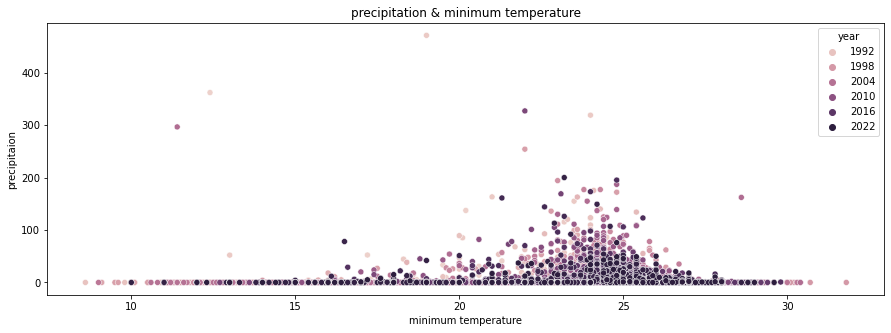

In [58]:
plt.figure(figsize=(15,5))
plt.title('precipitation & minimum temperature')
plt.xlabel('minimum temperature')
plt.ylabel('precipitaion')
sns.scatterplot(bhubhneshwar['tmin'],bhubhneshwar['prcp'],hue = bhubhneshwar['year'])


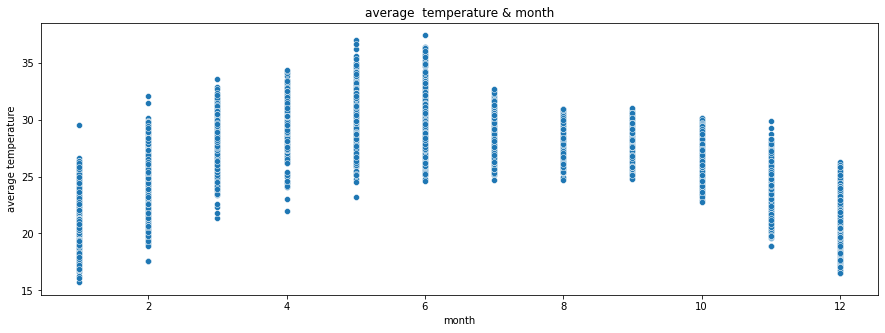

In [28]:
plt.figure(figsize=(15,5))
plt.title('average  temperature & month')
plt.xlabel('month')
plt.ylabel('average temperature')
sns.scatterplot(bhubhneshwar['month'],bhubhneshwar['tavg'])
plt.show()


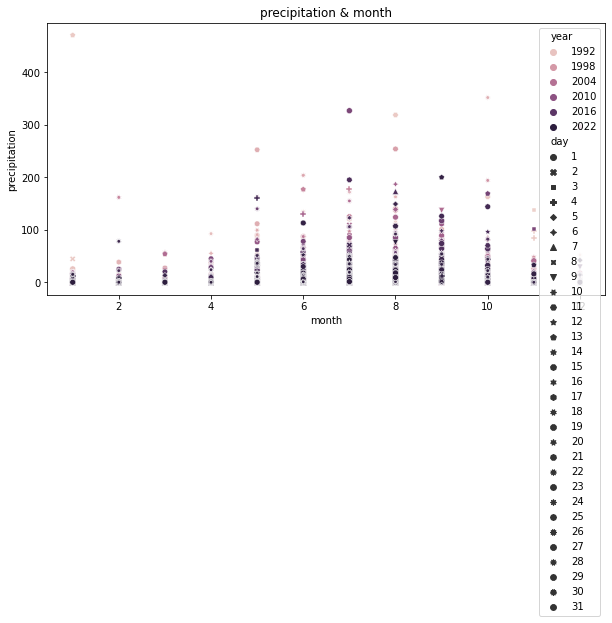

In [30]:
plt.figure(figsize=(10,5))
plt.title('precipitation & month')
plt.xlabel('month')
plt.ylabel('precipitation')
sns.scatterplot(bhubhneshwar['month'],bhubhneshwar['prcp'],bhubhneshwar['year'],bhubhneshwar['day'])
plt.show()
